<a href="https://colab.research.google.com/github/alimkacar/MLexamplesCOLAB/blob/main/FBProphet_ile_Zamana_Ba%C4%9Fl%C4%B1_Yapay_Zeka_Tahminler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Son gerçek fiyat:  $94,177.08
30 gün tahmini:    $157,109.01
60 gün tahmini:    $152,846.78
90 gün tahmini:    $151,336.09


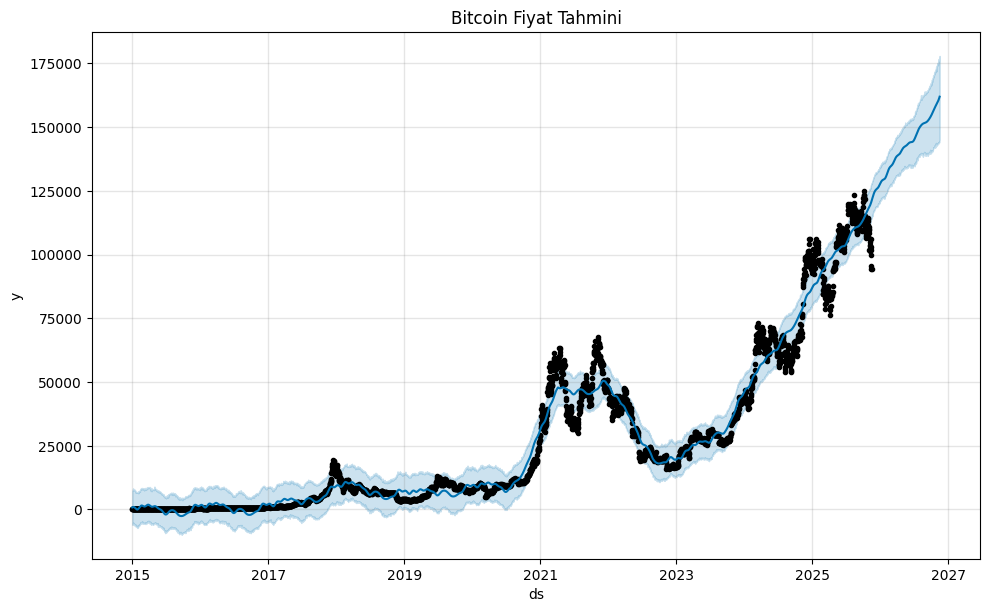

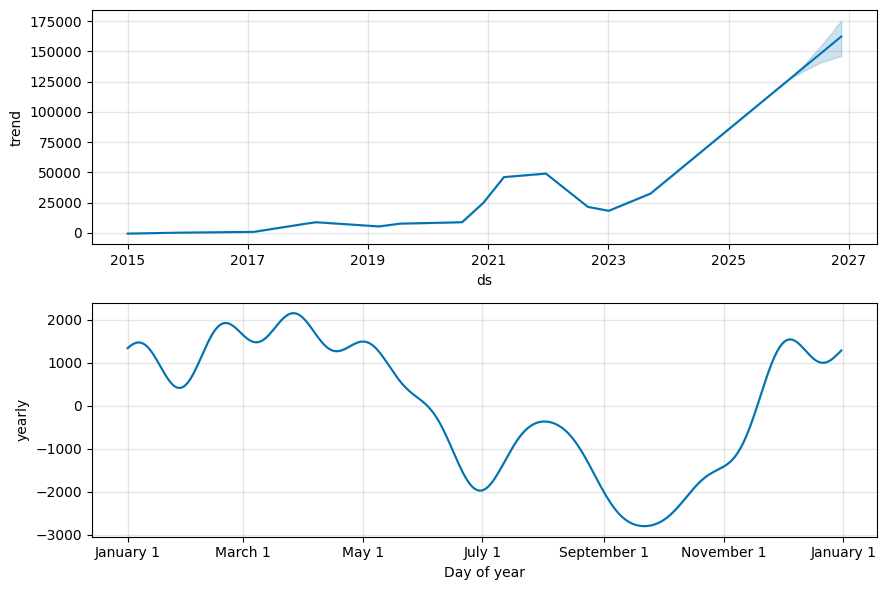

In [ ]:

!pip install -q prophet


import pandas as pd
import yfinance as yf
from prophet import Prophet
import warnings
import logging
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


df = yf.download('BTC-USD', start="2015-01-01", end="2025-11-17")


if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

df = df.reset_index()


df_prophet = pd.DataFrame({
    'ds': df['Date'],
    'y': df['Close']
}).dropna()


model = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
model.fit(df_prophet)


future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


son_fiyat = df_prophet['y'].iloc[-1]
tahmin_30 = forecast['yhat'].iloc[-30]
tahmin_60 = forecast['yhat'].iloc[-60]
tahmin_90 = forecast['yhat'].iloc[-90]

print(f"Son gerçek fiyat:  ${son_fiyat:,.2f}")
print(f"30 gün tahmini:    ${tahmin_30:,.2f}")
print(f"60 gün tahmini:    ${tahmin_60:,.2f}")
print(f"90 gün tahmini:    ${tahmin_90:,.2f}")




fig1 = model.plot(forecast)
plt.title('Bitcoin Fiyat Tahmini')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()